In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

In [3]:
# Configure the custom library path
import os
import sys

module_path = os.path.abspath(os.path.join('../'))
sys.path.insert(0, module_path)

In [4]:
# Import custom library
from lib import find_period, find_min_values, find_max_values

In [5]:
# Read the data
dataFase = pd.read_csv('./data/FASE.csv', delimiter=',')
dataDesfase = pd.read_csv('./data/DESFASE.csv', delimiter=',')

In [6]:
# First experiment
FASE = {
    '6': {
        'T': dataFase['6-T'][~np.isnan(dataFase['6-T'])].values,
        'A': dataFase['6-A1'][~np.isnan(dataFase['6-A1'])].values,
        'B': dataFase['6-B1'][~np.isnan(dataFase['6-B1'])].values,
    },
    '11.5': {
        'T': dataFase['11.5-T'][~np.isnan(dataFase['11.5-T'])].values,
        'A': dataFase['11.5-A1'][~np.isnan(dataFase['11.5-A1'])].values,
        'B': dataFase['11.5-B1'][~np.isnan(dataFase['11.5-B1'])].values,
    },
    '13.8': {
        'T': dataFase['13.8-T'][~np.isnan(dataFase['13.8-T'])].values,
        'A': dataFase['13.8-A1'][~np.isnan(dataFase['13.8-A1'])].values,
        'B': dataFase['13.8-B1'][~np.isnan(dataFase['13.8-B1'])].values,
    },
    '21.5': {
        'T': dataFase['21.5-T'][~np.isnan(dataFase['21.5-T'])].values,
        'A': dataFase['21.5-A1'][~np.isnan(dataFase['21.5-A1'])].values,
        'B': dataFase['21.5-B1'][~np.isnan(dataFase['21.5-B1'])].values,
    },
    '26.5': {
        'T': dataFase['26.5-T'][~np.isnan(dataFase['26.5-T'])].values,
        'A': dataFase['26.5-A1'][~np.isnan(dataFase['26.5-A1'])].values,
        'B': dataFase['26.5-B1'][~np.isnan(dataFase['26.5-B1'])].values,
    },
    '29.5': {
        'T': dataFase['29.5-T'][~np.isnan(dataFase['29.5-T'])].values,
        'A': dataFase['29.5-A1'][~np.isnan(dataFase['29.5-A1'])].values,
        'B': dataFase['29.5-B1'][~np.isnan(dataFase['29.5-B1'])].values,
    },
}

DESFASE = {
    '6': {
        'T': dataDesfase['6-T'][~np.isnan(dataDesfase['6-T'])].values,
        'A': dataDesfase['6-A1'][~np.isnan(dataDesfase['6-A1'])].values,
        'B': dataDesfase['6-B1'][~np.isnan(dataDesfase['6-B1'])].values,
    },
    '11.5': {
        'T': dataDesfase['11.5-T'][~np.isnan(dataDesfase['11.5-T'])].values,
        'A': dataDesfase['11.5-A1'][~np.isnan(dataDesfase['11.5-A1'])].values,
        'B': dataDesfase['11.5-B1'][~np.isnan(dataDesfase['11.5-B1'])].values,
    },
    '13.8': {
        'T': dataDesfase['13.8-T'][~np.isnan(dataDesfase['13.8-T'])].values,
        'A': dataDesfase['13.8-A1'][~np.isnan(dataDesfase['13.8-A1'])].values,
        'B': dataDesfase['13.8-B1'][~np.isnan(dataDesfase['13.8-B1'])].values,
    },
    '21.5': {
        'T': dataDesfase['21.5-T'][~np.isnan(dataDesfase['21.5-T'])].values,
        'A': dataDesfase['21.5-A1'][~np.isnan(dataDesfase['21.5-A1'])].values,
        'B': dataDesfase['21.5-B1'][~np.isnan(dataDesfase['21.5-B1'])].values,
    },
    '26.5': {
        'T': dataDesfase['26.5-T'][~np.isnan(dataDesfase['26.5-T'])].values,
        'A': dataDesfase['26.5-A1'][~np.isnan(dataDesfase['26.5-A1'])].values,
        'B': dataDesfase['26.5-B1'][~np.isnan(dataDesfase['26.5-B1'])].values,
    },
    '29.5': {
        'T': dataDesfase['29.5-T'][~np.isnan(dataDesfase['29.5-T'])].values,
        'A': dataDesfase['29.5-A1'][~np.isnan(dataDesfase['29.5-A1'])].values,
        'B': dataDesfase['29.5-B1'][~np.isnan(dataDesfase['29.5-B1'])].values,
    },
}

In [7]:
# Derterminar periodo
DESFASE_PERIOD = {}
for key, value in DESFASE.items():
    A = np.mean(find_period({ 'x': value['A'], 't': value['T'] }))
    B = np.mean(find_period({ 'x': value['B'], 't': value['T'] }))
    DESFASE_PERIOD[key] = (A + B) / 2

FASE_PERIOD = {}
for key, value in FASE.items():
    A = np.mean(find_period({ 'x': value['A'], 't': value['T'] }))
    B = np.mean(find_period({ 'x': value['B'], 't': value['T'] }))
    FASE_PERIOD[key] = (A + B) / 2

print('FASE')
print(FASE_PERIOD)
print('DESFASE')
print(DESFASE_PERIOD)


FASE
{'6': 1.1750000000000003, '11.5': 1.1732142857142855, '13.8': 1.1775000000000002, '21.5': 1.1800000000000002, '26.5': 1.1800000000000002, '29.5': 1.1675}
DESFASE
{'6': 1.163333333333333, '11.5': 1.0699999999999998, '13.8': 1.0250000000000001, '21.5': 0.915, '26.5': 0.8416666666666667, '29.5': 0.8142857142857143}


In [8]:
# Determinar frecuencia
FASE_W1 = {}
for key, value in FASE_PERIOD.items():
    FASE_W1[key] = (2 * np.pi) / value

DESFASE_W2 = {}
for key, value in DESFASE_PERIOD.items():
    DESFASE_W2[key] = (2 * np.pi) / value

print('FASE')
print(FASE_W1)
print('DESFASE')
print(DESFASE_W2)

FASE
{'6': 5.347391750791136, '11.5': 5.3555308554346555, '13.8': 5.336038477434892, '21.5': 5.32473331116914, '26.5': 5.32473331116914, '29.5': 5.381743303794078}
DESFASE
{'6': 5.401018888693055, '11.5': 5.872135801102418, '13.8': 6.129936885053254, '21.5': 6.866869188174411, '26.5': 7.465170661995548, '29.5': 7.7161924825012465}


In [9]:
# Determinar relacion
L = 39.5 / 100

RELATION = {}
for key, value in DESFASE.items():
    RELATION[key] = (float(key) / 100) / L

print('RELATION')
print(RELATION)

RELATION
{'6': 0.15189873417721517, '11.5': 0.2911392405063291, '13.8': 0.34936708860759497, '21.5': 0.5443037974683544, '26.5': 0.6708860759493671, '29.5': 0.7468354430379746}


In [33]:
# Determinar cuadraticas
R_CUAD = np.power(list(RELATION.values()), 2)
W2_CUAD = np.power(list(DESFASE_W2.values()), 2)

In [11]:
# Regresion lineal
slope, intercept, _, _, _ = stats.linregress(R_CUAD, W2_CUAD)
# Calcular incertidubmbre


print('slope: ', slope)
print('intercept: ', intercept)

# Calcular g y k
L = 39.5 / 100
M = 0.1

g = (intercept * L)
k = (slope * M) / 2

print('g: ', g)
print('k: ', k)


slope:  56.22519511643965
intercept:  29.56689301694609
g:  11.678922741693706
k:  2.8112597558219825


In [28]:
delta_t = 0.1

# Derterminar periodo
DESFASE_PERIOD_del = {}
for key, value in DESFASE.items():
    A = np.mean(find_period({ 'x': value['A'], 't': value['T'] }))
    B = np.mean(find_period({ 'x': value['B'], 't': value['T'] }))
    DESFASE_PERIOD_del[key] = (A + delta_t + B + delta_t) / 2

FASE_PERIOD_del = {}
for key, value in FASE.items():
    A = np.mean(find_period({ 'x': value['A'], 't': value['T'] }))
    B = np.mean(find_period({ 'x': value['B'], 't': value['T'] }))
    FASE_PERIOD_del[key] = (A + delta_t + B + delta_t) / 2

# Determinar frecuencia
FASE_W1_del = {}
for key, value in FASE_PERIOD_del.items():
    FASE_W1_del[key] = (2 * np.pi) / value

DESFASE_W2_del = {}
for key, value in DESFASE_PERIOD_del.items():
    DESFASE_W2_del[key] = (2 * np.pi) / value

# Determinar delta
delta_W2 = {}
for key, value in DESFASE_W2.items():
    delta_W2[key] = abs(DESFASE_W2_del[key] - value)

delta_W1 = {}
for key, value in FASE_W1.items():
    delta_W1[key] = abs(FASE_W1_del[key] - value)

print('FASE')
print(delta_W1)

# Determinar cuadraticas
R_CUAD_del_mas = np.power(np.array(list(RELATION.values())) + 0.001, 2)
W2_CUAD_del_mas = np.power(np.array(list(DESFASE_W2.values())) + np.array(list(delta_W2.values())), 2)

R_CUAD_del_men = np.power(np.array(list(RELATION.values())) - 0.001, 2)
W2_CUAD_del_men = np.power(np.array(list(DESFASE_W2.values())) - np.array(list(delta_W2.values())), 2)

W2_CUAD = np.power(list(DESFASE_W2.values()), 2)
R_CUAD = np.power(list(RELATION.values()), 2)

# Regresion lineal
slope, intercept, _, _, _ = stats.linregress(R_CUAD, W2_CUAD)
slope_mas, intercept_mas, _, _, _ = stats.linregress(R_CUAD_del_mas, W2_CUAD_del_mas)
slope_men, intercept_men, _, _, _ = stats.linregress(R_CUAD_del_men, W2_CUAD_del_men)

# Calcular g y k
L = 39.5 / 100
M = 0.1

g = (intercept * L)
k = (slope * M) / 2

# Calcular incertidubmbre
g_mas = (intercept_mas * (L + 0.001))
k_mas = (slope_mas * M) / 2

g_men = (intercept_men * (L - 0.001))
k_men = (slope_men * M) / 2

delta_g = abs(g_mas - g_men) / 2
delta_k = abs(k_mas - k_men) / 2


FASE
{'6': 0.4194032745718532, '11.5': 0.42063075442404063, '13.8': 0.417693814280617, '21.5': 0.4159947899350884, '26.5': 0.4159947899350893, '29.5': 0.4245951324492374}


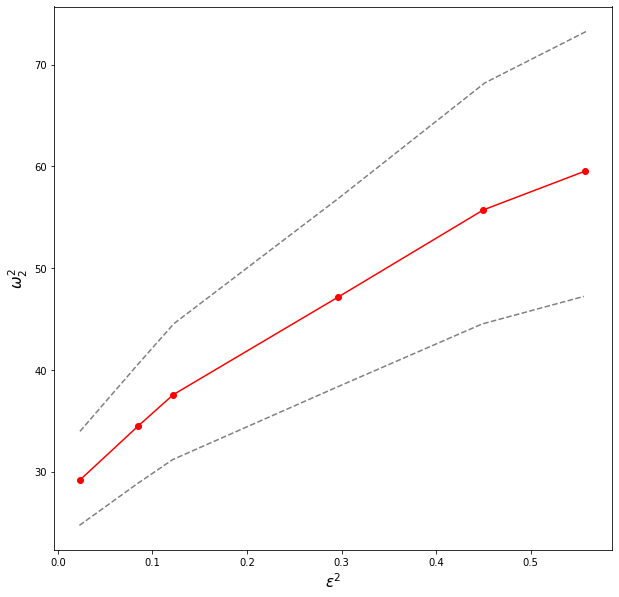

In [43]:
font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'black','size':15}

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.plot(R_CUAD, W2_CUAD, 'o', color = 'red')
plt.plot(R_CUAD, W2_CUAD, color = 'red')
plt.plot(R_CUAD_del_mas, W2_CUAD_del_mas, '--', color = 'gray')
plt.plot(R_CUAD_del_men, W2_CUAD_del_men, '--', color = 'gray')
# plt.title("$\omega_2^2 \:  vs \:  \epsilon^2$", fontdict = font1)
plt.xlabel('$\epsilon^2$', fontdict = font2)
plt.ylabel('$\omega_2^2$', fontdict = font2)

plt.show()

In [13]:
print('g: ', g, ' +/- ', delta_g)
print('k: ', k, ' +/- ', delta_k)

g:  11.678922741693706  +/-  1.8163464885396419
k:  2.8112597558219825  +/-  0.7787078061620223


In [32]:
# print w2 with delta_w2
print('W2')
for key, value in DESFASE_W2.items():
    print(key, ': ', value, ' +/- ', delta_W2[key])

print('\n')

print('W1')
for key, value in FASE_W1.items():
    print(key, ': ', value, ' +/- ', delta_W1[key])

W2
6 :  5.401018888693055  +/-  0.42752128406541434
11.5 :  5.872135801102418  +/-  0.5018919488121742
13.8 :  6.129936885053254  +/-  0.5448832786714002
21.5 :  6.866869188174411  +/-  0.6765388362733411
26.5 :  7.465170661995548  +/-  0.7927614862296153
29.5 :  7.7161924825012465  +/-  0.8439585527735742


W1
6 :  5.347391750791136  +/-  0.4194032745718532
11.5 :  5.3555308554346555  +/-  0.42063075442404063
13.8 :  5.336038477434892  +/-  0.417693814280617
21.5 :  5.32473331116914  +/-  0.4159947899350884
26.5 :  5.32473331116914  +/-  0.4159947899350893
29.5 :  5.381743303794078  +/-  0.4245951324492374


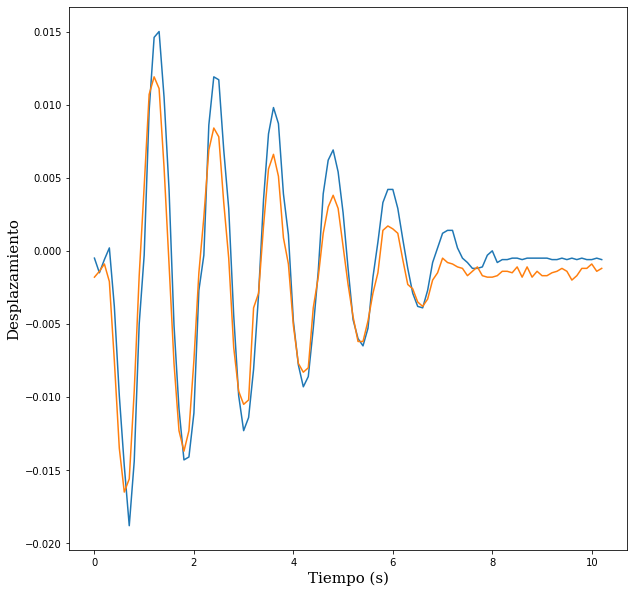

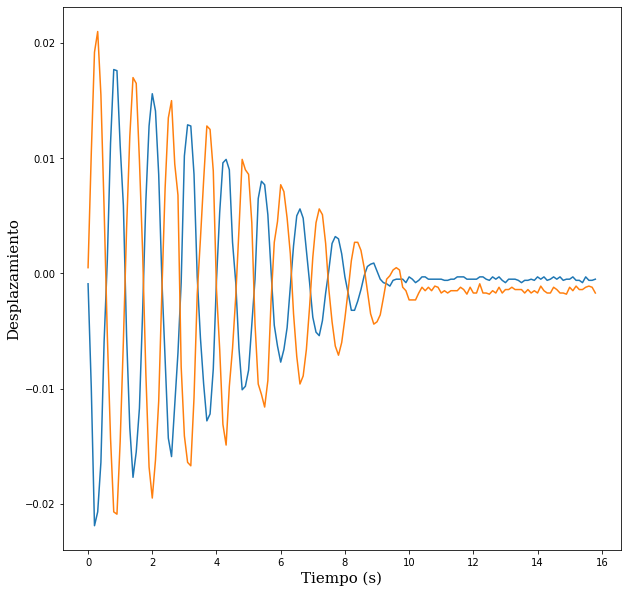

In [45]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.plot(FASE['6']['T'], FASE['6']['A'])
plt.plot(FASE['6']['T'], FASE['6']['B'])
plt.xlabel('Tiempo (s)', fontdict = font2)
plt.ylabel('Desplazamiento', fontdict = font2)
plt.show()

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.plot(DESFASE['6']['T'], DESFASE['6']['A'])
plt.plot(DESFASE['6']['T'], DESFASE['6']['B'])
plt.xlabel('Tiempo (s)', fontdict = font2)
plt.ylabel('Desplazamiento', fontdict = font2)
plt.show()